# LD6 Sound Synthesis

In [133]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import signal
from IPython.display import Audio
#import soundfile as sf

from IPython.core.display import HTML
HTML(r"""
<style>
    .jp-MarkdownCell .jp-RenderedHTMLCommon {
        font-family: "Times New Roman", Times, serif;
        font-size: 20px
    }
</style>
""")

# Additive Synthesis

the frequency of highest harmonic should less than fs/2(44100/2=22050)

In [134]:
fs = 44100
t = np.linspace(0, 5, 5 * fs)
f0 = 440
pureSineTone = np.sin(2 * np.pi * f0 * t)

In [135]:
Audio(data = pureSineTone, rate = fs)

In [136]:
ampList = [1, 0.263, 0.14, 0.099, 0.209, 0.02, 0.029, 0.077, 0.017, 0.01]

addSyn = np.zeros_like(pureSineTone)

for i in range(len(ampList)):
    f = f0 * (i + 1)
    addSyn = addSyn + ampList[i] * np.sin(2 * np.pi * f * t)

addSyn = addSyn / np.max(np.abs(addSyn))

In [137]:
Audio(data = addSyn, rate = fs)

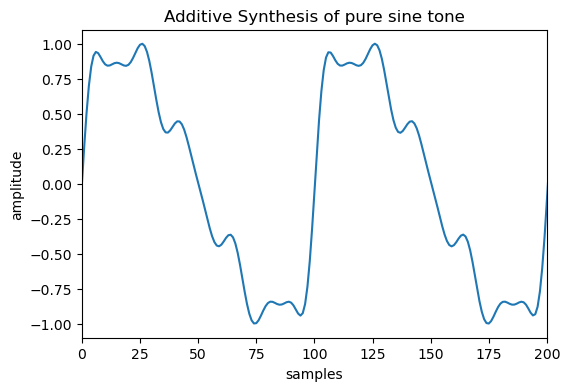

In [138]:
plt.figure(figsize=(6, 4))
plt.plot(addSyn)
plt.xlim([0, 200])
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('Additive Synthesis of pure sine tone')

plt.show()

# FM Synthesis 

In [148]:
fm = 50    # modulation frequency
modSig = np.sin(2 * np.pi * fm * t) # modulation signal

pmSyn = np.sin(2 * np.pi * f0 * t + modSig)
fmSyn = np.sin(2 * np.pi * f0 * (1 + modSig) * t) 


In [149]:
Audio(data = pmSyn*0.1, rate = fs)

In [150]:
Audio(data = fmSyn*0.1, rate = fs)

# References

- https://deepnote.com/app/chuckjee/Blending-pure-tones-Additive-Synthesis-from-scratch-with-Python-code-e0fb471d-1cce-4e57-9142-cfb7f9a4899c